In [26]:
import torch
import sys
sys.path.append('../../modules')
from notable_functions import gibbs_function as arctan20x
from notable_kernels import *
from nn_rbf_poly import RBF_Poly
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green']
x_ver = torch.linspace(-1, 1, 300).reshape(-1, 1)

In [25]:
def plot_images(x_ver, y_ver, fn):
    for phs_deg in [1, 3, 5, 7]:
        fig = plt.figure(figsize=(7, 3.2))
        deg = 1
        i = 0
        plt.subplot(1, 2, 1)
        plt.plot(x_ver, y_ver, color='black', label='arctan(20x)')
        for n in [5, 8, 18]:
            x = torch.linspace(-1, 1, n).reshape(-1, 1)
            y = fn(x)

            rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))
            A = rbf.get_interpolation_matrix(x)
            opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
            rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)
            
            with torch.no_grad():
                plt.subplot(1, 2, 1)
                plt.plot(x_ver, rbf(x_ver), color=colors[i], label=f'{n} centers\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
                plt.subplot(1, 2, 2)
                plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver), 
                            color=colors[i], label=f'{n} centers', linestyle='--')
            i += 1
            
        plt.subplot(1,2,1)
        
        plt.title('PHS interpolation '+ rf'($r^{phs_deg}+\alpha_1+\alpha_2 x$)')
        handles, labels = plt.gca().get_legend_handles_labels()

        plt.subplot(1, 2, 2)
        plt.title('Relative error (log-10 scale)')
        plt.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()
        plt.close()

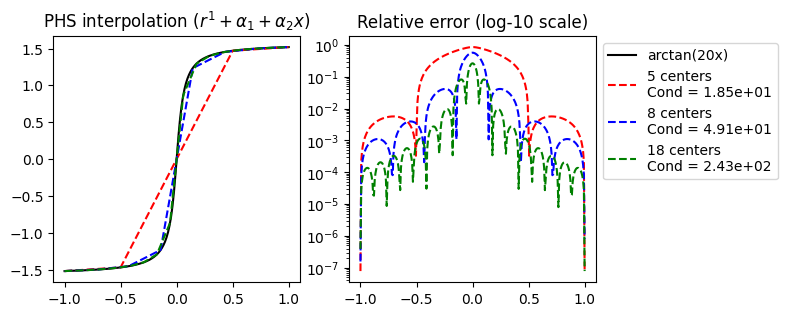

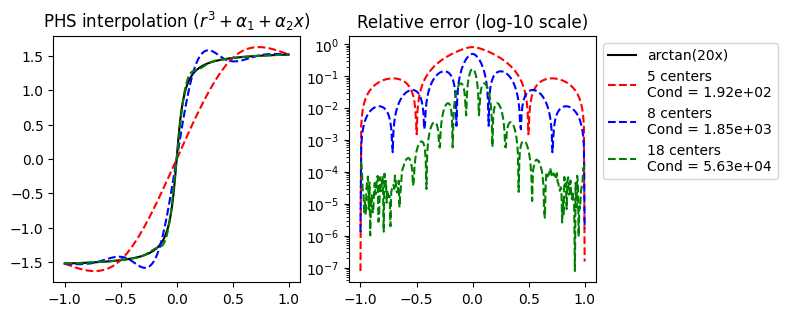

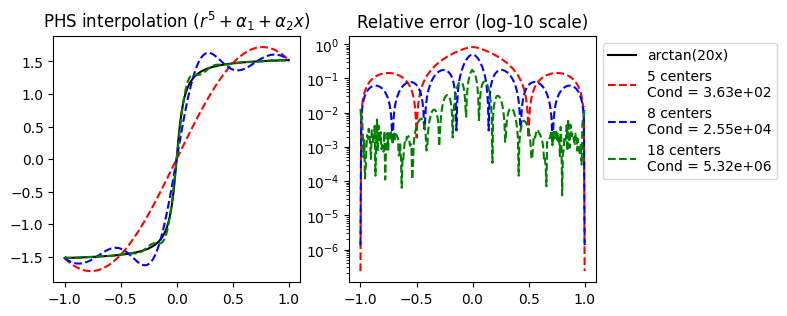

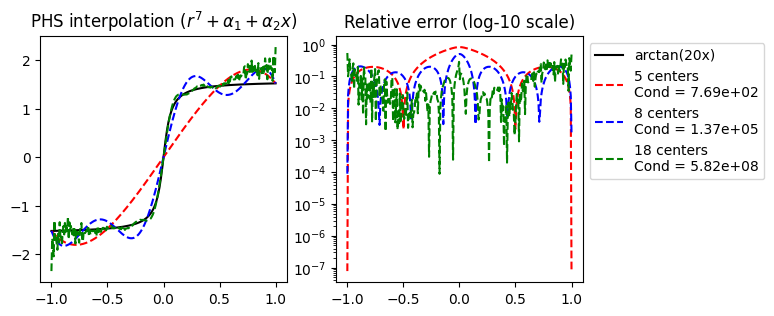

In [27]:
y_ver = arctan20x(x_ver)
plot_images(x_ver, y_ver,arctan20x)

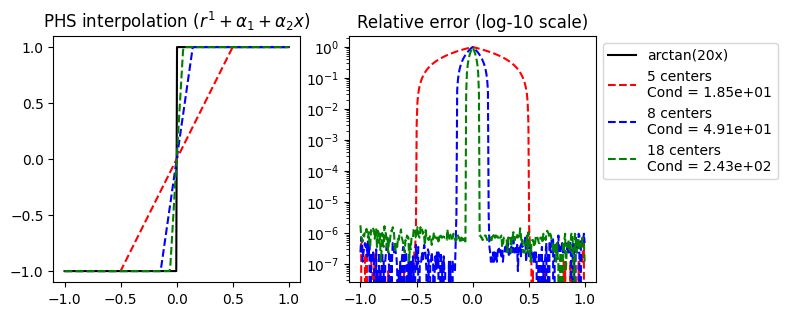

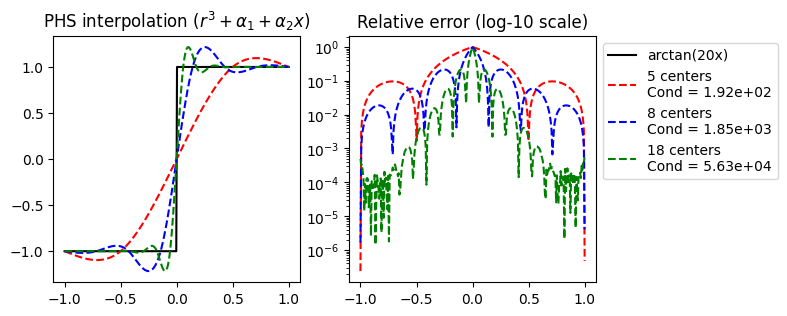

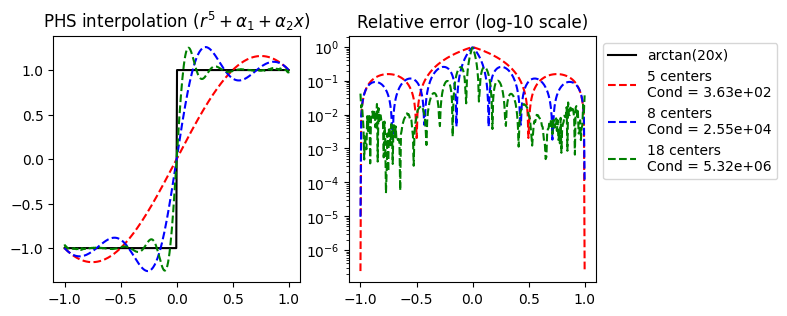

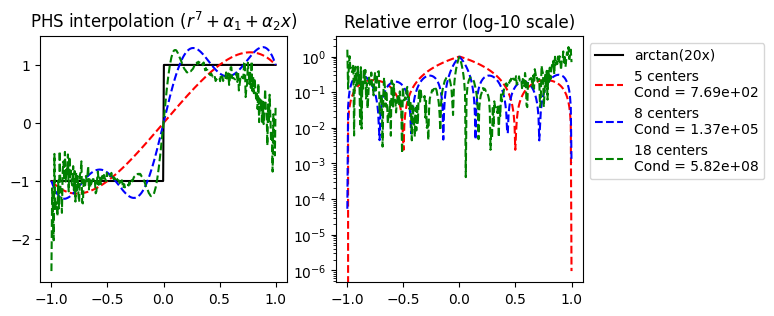

In [28]:
from torch import sign
y_ver = sign(x_ver)
plot_images(x_ver, y_ver, sign)